1. [Introduzione](#introduction)

2. [Data Cleaning & Data Manipulation](#data_clean_man)

3. [EDA](#eda) 

    - [Analisi generali](#general)
    - [Relazioni con la famiglia](#family_rel)
    - [Relazioni con le istituzioni educative](#school_rel)
    - [Gestione del tempo](#time_mng)
    - [Conclusioni](#conclusions)

4. [Analisi Predittiva](#pred_ana)

    - [Random Forest (obbl)](#random_forest)
    - [Support Vector Regression (obbl)](#SVR)
    - [Logistic Regression (opz.)](#log_reg)
    - [KNN (opz.)](#KNN)
    - [Confronto](#comparison)


[Help](https://www.kaggle.com/code/akerineth/notebook762a532494)

In [1]:
#import library 

#! pip install graphviz

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from graphviz import Digraph
from IPython.display import display

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

<h1 id="introduction"> Introduzione </h1>

<b>SCALETTA: TO DELETE</b>
Visualizzazione dei dati tramite shape, info, description

Analisi descrittiva su:

<ul>
    <li>Cosa sto analizzando?</li>
    <li>Come posso scomporre il problema?</li>
    <li>Cosa mi aspetto di trovare? Da ogni sotto problema?</li>
</ul>

<b>END TO DELETE</b>

In [2]:
mat = pd.read_csv('dataset/dataset/student-mat.csv')
por = pd.read_csv('dataset/dataset/student-por.csv')

Questo progetto si articola in 2 parti:
<ul>
<li>una prima parte è volta ad analizzare il consumo di alcolici nei giovani, prendendo ad esame un <a href="https://www.kaggle.com/datasets/uciml/student-alcohol-consumption">dataset</a> di studenti della scuola secondaria (15-22 anni), cercando di capire se e quali possono essere le sottoaree su cui intervenire.</li>
<li>successivamente, si procederà, usando lo stesso dataset, ad un'analisi predittiva sul voto finale di uno studente, utilizzando differenti algoritmi di ML e mettendoli a confronto.</li>
</ul>

In [3]:
#Dataset Analysis


Il dataset selezionato, ha messo a disposizione le seguenti colonne:

In [4]:
mat.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

<h1 id="data_clean_man"> Data Cleaning & Manipulation </h1>

In [5]:
#Join Dataset Analysis

print('por.shape: ', por.shape)
print('mat.shape: ', mat.shape)

por.shape:  (649, 33)
mat.shape:  (395, 33)


In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
print('Numero di righe duplicate per dataset')
print('Por: ', len(por[por.duplicated()]))
print('Mat', len(mat[mat.duplicated()]))

Numero di righe duplicate per dataset
Por:  0
Mat 0


In [9]:
mat['course'] = 'MT'
por['course'] = 'PR'
both = pd.concat([por, mat])

both = both.reset_index()

In [10]:
#controllo che anche dopo l'unione, non ci siano righe duplicate, escludendo la colonna course dalla ricerca
both[both.duplicated(subset=both.columns.difference(['course']))]

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course


In [11]:
# Ove possibile, vengono trasformate le variabili non numeriche in variabili numeriche

In [12]:
both_bck = both

In [13]:
categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic'
]

not_categorical_columns = ['Mjob', 'Fjob', 'reason', 'guardian']

In [14]:
# 1. Applicare LabelEncoder alle colonne specificate
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    both[column] = le.fit_transform(both[column])
    label_encoders[column] = le

In [15]:
# 2. Applicare OneHotEncoder alle altre colonne specificate
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' evita la trappola delle variabili dummy
encoded_columns = onehot_encoder.fit_transform(both[not_categorical_columns])

/Users/malefica/opt/anaconda3/envs/s2i/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
# 3. Creare un DataFrame con le nuove colonne
encoded_columns_df = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out(not_categorical_columns))

In [17]:
# 4. Unire il DataFrame originale con le nuove colonne
both = both.drop(not_categorical_columns, axis=1)
both = pd.concat([both, encoded_columns_df], axis=1)

In [18]:
both.columns.values

array(['index', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'course', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'], dtype=object)

In [19]:
both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1044 non-null   int64  
 1   school             1044 non-null   int64  
 2   sex                1044 non-null   int64  
 3   age                1044 non-null   int64  
 4   address            1044 non-null   int64  
 5   famsize            1044 non-null   int64  
 6   Pstatus            1044 non-null   int64  
 7   Medu               1044 non-null   int64  
 8   Fedu               1044 non-null   int64  
 9   traveltime         1044 non-null   int64  
 10  studytime          1044 non-null   int64  
 11  failures           1044 non-null   int64  
 12  schoolsup          1044 non-null   int64  
 13  famsup             1044 non-null   int64  
 14  paid               1044 non-null   int64  
 15  activities         1044 non-null   int64  
 16  nursery            1044 

In [20]:
general = ['school', 'sex', 'age', 'health']
family = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup', 'famrel']
school = ['failures', 'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'absences']
time = ['traveltime', 'studytime', 'freetime', 'goout']

<h1 id="eda">EDA</h1>

<b>SCALETTA: TO DELETE</b>
Analisi esplorativa volta ad avere un focus sulle seguenti macroaree:
<ul>
    <li>Analisi Generale</li>
    <li>Relazioni con la famiglia</li>
    <li>Relazioni con la scuola</li>
    <li>Gestione del tempo</li>
</ul>
<b>END TO DELETE</b>

Dopo una prima Analisi del dataset e data la moltitudine di dati forniti da esso, è stato deciso di scomporre il problema in sottocategorie, che potessero, per quanto possibile, cercare di capire quale possa essere il rapporto degli adolescenti con l'alcol e soprattutto cercare di capire se i casi più critici possano essere ricondotti a una medesima causa.


Le macroaree individuate essere d'interesse sono:

<ul>
<li><b>Analisi generale</b>: finalizzata a dare una panoramica generale </li>
<li><b>Rapporto con la famiglia</b>: volta a individuare le criticità che possono esserci in ambito familiare</li>
<li><b>Rapporto con le istituzioni scolastiche</b>: volta a individuare le criticità che possono esserci in ambito scolastico</li>
<li><b>Impiego del tempo</b>:</li>
</ul>

In [24]:
dot = Digraph(comment='Diagramma a Blocchi')
dot.attr(splines='ortho', nodesep='0.2')

In [25]:
dot.node('A', 'Consumo di alcol [15-22]', shape='box', style='filled', color='lightgrey')

dot.node('B', 'Panoramica \ngenerale', shape='box', style='filled', color='lightblue')
dot.node('C', 'Relazioni \nfamiliari', shape='box', style='filled', color='lightblue')
dot.node('D', 'Relazioni \nscolastiche', shape='box', style='filled', color='lightblue')
dot.node('E', 'Gestione \ntempo', shape='box', style='filled', color='lightblue')

In [26]:
dot.edge('A', 'B')
dot.edge('A', 'C')
dot.edge('A', 'D')
dot.edge('A', 'E')

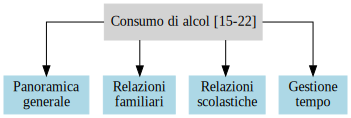

In [27]:
display(dot)

<h2 id="general">Panoramica Generale</h2>

<h2 id="family_rel">Relazioni con la famiglia</h2>

<h2 id="#school_rel">Relazioni con le istituzioni educative</h2>

<h2 id="time_mng">Gestione del tempo</h2>

<h2 id="conclusions">Conclusioni</h2>

<h1 id="pred_ana">Data Prediction</h1>

<h2 id="random_forest">Random Forest</h2>

<h2 id="SVR">Support Vector Regression</h2>

<h2 id="log_reg">Logistic Regression</h2>

<h2 id="KNN">KNN</h2>

<h2 id="comparison">Confronto</h2>

In [ ]:
dalc_counts = total['Dalc'].value_counts().sort_index()
walc_counts = total['Walc'].value_counts().sort_index()

In [ ]:
# Creazione del grafico a righe per Dalc
plt.figure(figsize=(10, 5))
plt.plot(dalc_counts.index, dalc_counts.values, marker='o', linestyle='-', label='Dalc')
plt.plot(walc_counts.index, walc_counts.values, marker='o', linestyle='-', label='Walc')
plt.title('Conteggio dei valori di Dalc e Walc')
plt.xlabel('Valori di Dalc e Walc')
plt.ylabel('Conteggio')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Contare la frequenza dei valori univoci di Dalc
dalc_counts = total['Dalc'].value_counts().sort_index().reset_index()
dalc_counts.columns = ['Value', 'Count']
dalc_counts['Type'] = ('workday - Dalc')

In [ ]:
# Contare la frequenza dei valori univoci di Walc
walc_counts = total['Walc'].value_counts().sort_index().reset_index()
walc_counts.columns = ['Value', 'Count']
walc_counts['Type'] = 'weekend - Walc'

In [ ]:
combined_counts = pd.concat([dalc_counts, walc_counts])

In [ ]:
# Creare il grafico interattivo con Plotly
fig = px.line(combined_counts, x='Value', y='Count', color='Type', markers=True,
              labels={'Value': 'Valori di Dalc e Walc', 'Count': 'Conteggio'},
              title='Numero studenti per consumo di alcol (1-low 5-high), \ndurante la settimana (Dalc) e nel weekend(Walc)')

# Aggiungere hover data per visualizzare il conteggio totale
fig.update_traces(mode='markers+lines', hovertemplate='%{y}')

# Mostrare il grafico
fig.show()

In [ ]:
# Creare la figura
fig = go.Figure()

# Aggiungere le barre per Dalc
fig.add_trace(go.Bar(
    y=dalc_counts.index,
    x=dalc_counts.values,
    name='Dalc',
    orientation='h',
    marker=dict(color='blue')
))

# Aggiungere le barre per Walc
fig.add_trace(go.Bar(
    y=walc_counts.index,
    x=walc_counts.values,
    name='Walc',
    orientation='h',
    marker=dict(color='orange')
))

# Aggiornare il layout per le barre parallele
fig.update_layout(
    barmode='group',
    title='Conteggio dei valori di Dalc e Walc',
    xaxis_title='Conteggio',
    yaxis_title='Valori di Dalc e Walc',
    legend_title_text='Tipo di Consumo',
    legend=dict(
        x=0.01,  # posizione orizzontale della legenda
        y=0.99,  # posizione verticale della legenda
        traceorder='normal',
        font=dict(
            family='Arial',
            size=12,
            color='black'
        ),
        bgcolor='LightSteelBlue',
        bordercolor='Black',
        borderwidth=2
    )
)

# Aggiungere hover data per visualizzare il conteggio totale
fig.update_traces(hovertemplate='Conteggio: %{x}')

# Mostrare il grafico
fig.show()

In [ ]:


# Calcolare la media di Dalc per ciascuna fascia d'età
age_dalc_mean = total.groupby('age')['Dalc'].mean().reset_index()

# Creare il grafico a barre
fig = px.bar(age_dalc_mean, x='age', y='Dalc', 
             labels={'age': 'Età', 'Dalc': 'Consumo medio di alcol nei giorni lavorativi'},
             title='Consumo medio di alcol nei giorni lavorativi per fascia d\'età')

# Aggiungere hover data per visualizzare il consumo medio di alcol
fig.update_traces(hovertemplate='Età: %{x}<br>Consumo medio: %{y}')

# Personalizzare il layout
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(range=[0, 5]),  # Imposta il range dell'asse y da 0 a 5
    bargap=0.2,  # Spazio tra le barre
    plot_bgcolor='rgba(0,0,0,0)',  # Sfondo trasparente
    title_x=0.5,  # Centra il titolo
)

# Mostrare il grafico
fig.show()
